In [1]:
import sys
sys.path.append('../')

In [2]:
from src import visualization, models
from src.database_tmp import Database
from keras.models import load_model
import os
import time

Using TensorFlow backend.


# Prepare database

In [7]:
triplet_extractor_path = '../models/final/triplet-2019-05-24 21_06_53.h5'
triplet_extractor = load_model(triplet_extractor_path)

/home/victor/.local/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [8]:
db_directory = '../database/stanford_online_products'
triplet_db = Database(triplet_extractor, db_directory)

Found 1600 images belonging to 1 classes.


In [9]:
triplet_db.load_features_database('features-triplet')

In [10]:
num_clusters = 2
triplet_db.create_kmeans(num_clusters)

Kmeans created


In [3]:
cnn_classifier_path = '../models/final/2019-05-24 21_06_53.h5'
cnn_classifier = load_model(cnn_classifier_path)

cnn_extractor = models.build_cnn_extractor(cnn_classifier)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [4]:
db_directory = '../database/stanford_online_products'
cnn_db = Database(cnn_extractor, db_directory)

Found 1600 images belonging to 1 classes.


In [5]:
cnn_db.load_features_database('features-non-triplet')

In [6]:
num_clusters = 2
cnn_db.create_kmeans(num_clusters)

Kmeans created


# QUERY

## Query with triplet

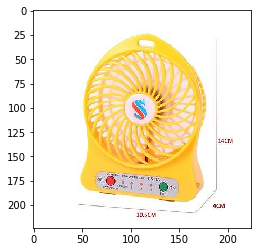

In [21]:
query_images_directory = '../data/raw/_2_fan_kettle_600_200_200'
query_images_dataset = 'valid'
image_file_name = 'fan/221835113841_1.JPG'

query_image_path = os.path.join(query_images_directory, query_images_dataset, image_file_name)
query_image = triplet_db.load_image(query_image_path)
visualization.show_single_image(query_image)

Time for query: 0.3642234802246094


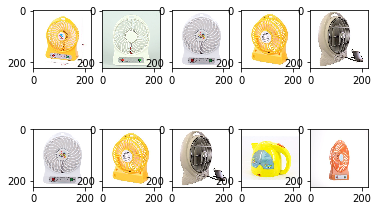

In [25]:
# query without kmeans
num_results = 10
start = time.time()
result_images = triplet_db.query(query_image, use_kmeans=False, num_results=num_results)
print('Time for query:', time.time() - start)
visualization.show_many_images(result_images, row=2, col=5)

Time for query: 0.37894296646118164


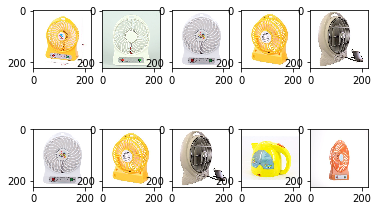

In [27]:
# query with kmeans
num_results = 10
start = time.time()
result_images = triplet_db.query(query_image, use_kmeans=True, num_results=num_results)
print('Time for query:', time.time() - start)
visualization.show_many_images(result_images, row=2, col=5)

## Query without triplet

Time for query: 0.3908712863922119


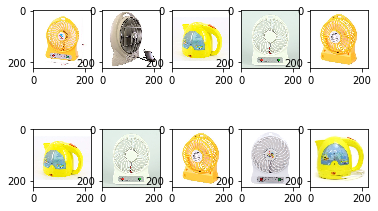

In [23]:
# query without kmeans
num_results = 10
start = time.time()
result_images = cnn_db.query(query_image, use_kmeans=False, num_results=num_results)
print('Time for query:', time.time() - start)
visualization.show_many_images(result_images, row=2, col=5)

Time for query: 0.38010478019714355


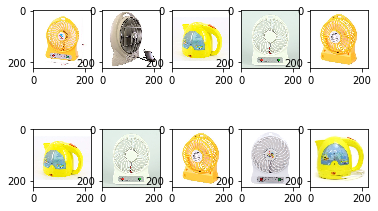

In [28]:
# query without kmeans
num_results = 10
start = time.time()
result_images = cnn_db.query(query_image, use_kmeans=True, num_results=num_results)
print('Time for query:', time.time() - start)
visualization.show_many_images(result_images, row=2, col=5)